1. Importing Required Libraries

This section imports the necessary Python libraries for numerical operations, plotting, data loading, data preprocessing, and custom modules for one-hot encoding and MLP.

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from onehot import OneHotEncoder
from mlp import MLP

2. Loading the Digits Dataset

Load the handwritten digits dataset from scikit-learn. This dataset contains 1797 samples of 8x8 images representing digits 0-9.

In [108]:
df = load_digits()
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

3. Inspecting a Single Sample

Access a flattened data array (64 features) of the 101st digit in the dataset.

In [109]:
df.data[100]

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

4. Inspecting the Image Matrix

Display the 8x8 image representation of the 101st digit.

In [110]:
df.images[100]

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

5. Visualizing the Image

Plot the image using matplotlib to visually confirm the digit.

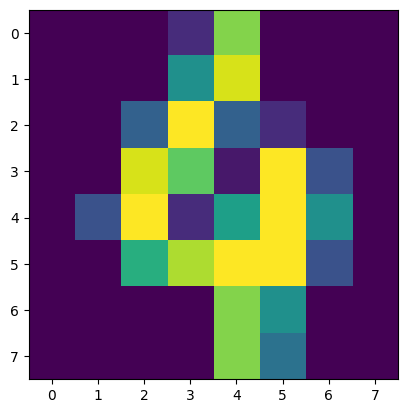

In [111]:
plt.imshow(df.images[100])

6. Accessing the Label

Check the actual digit label for the 101st sample.

In [112]:
df.target[100]

4

7. Preparing Features and Labels

Separate the dataset into input features X and target labels Y.

In [113]:
X = df.data
Y = df.target

8. One-Hot Encoding Labels

Convert categorical labels into one-hot encoded vectors using a custom OneHotEncoder.

In [114]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(Y)

9. Splitting Dataset into Train and Test Sets

Split the data into training and testing sets (80% train, 20% test).

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

10. Initializing the MLP Model

Create a multi-layer perceptron with input size equal to the number of features, two hidden layers (128 and 32 neurons), and output size equal to the number of classes. Set learning rate to 0.001

In [116]:
mlp = MLP(input_size=X_train.shape[1], hidden_sizes=[128, 32], output_size=Y_train.shape[1], learning_rate=0.001)


11. Training the MLP Model

Train the model on the training data for 50 epochs and evaluate on the test set after each epoch.

Epoch 1/50 - Loss: 0.3844 - Accuracy: 0.0717 - Test Loss: 0.3405 - Test Accuracy: 0.0972
Epoch 2/50 - Loss: 0.3428 - Accuracy: 0.0981 - Test Loss: 0.3294 - Test Accuracy: 0.1722
Epoch 3/50 - Loss: 0.3299 - Accuracy: 0.1942 - Test Loss: 0.3064 - Test Accuracy: 0.1806
Epoch 4/50 - Loss: 0.3071 - Accuracy: 0.1761 - Test Loss: 0.3130 - Test Accuracy: 0.1944
Epoch 5/50 - Loss: 0.3109 - Accuracy: 0.2303 - Test Loss: 0.3013 - Test Accuracy: 0.2778
Epoch 6/50 - Loss: 0.3037 - Accuracy: 0.2665 - Test Loss: 0.3194 - Test Accuracy: 0.1833
Epoch 7/50 - Loss: 0.3184 - Accuracy: 0.1969 - Test Loss: 0.3197 - Test Accuracy: 0.1972
Epoch 8/50 - Loss: 0.3220 - Accuracy: 0.1621 - Test Loss: 0.3098 - Test Accuracy: 0.2083
Epoch 9/50 - Loss: 0.3069 - Accuracy: 0.2373 - Test Loss: 0.3048 - Test Accuracy: 0.2278
Epoch 10/50 - Loss: 0.2999 - Accuracy: 0.2554 - Test Loss: 0.2852 - Test Accuracy: 0.3167
Epoch 11/50 - Loss: 0.2866 - Accuracy: 0.3340 - Test Loss: 0.2766 - Test Accuracy: 0.3889
Epoch 12/50 - Loss:

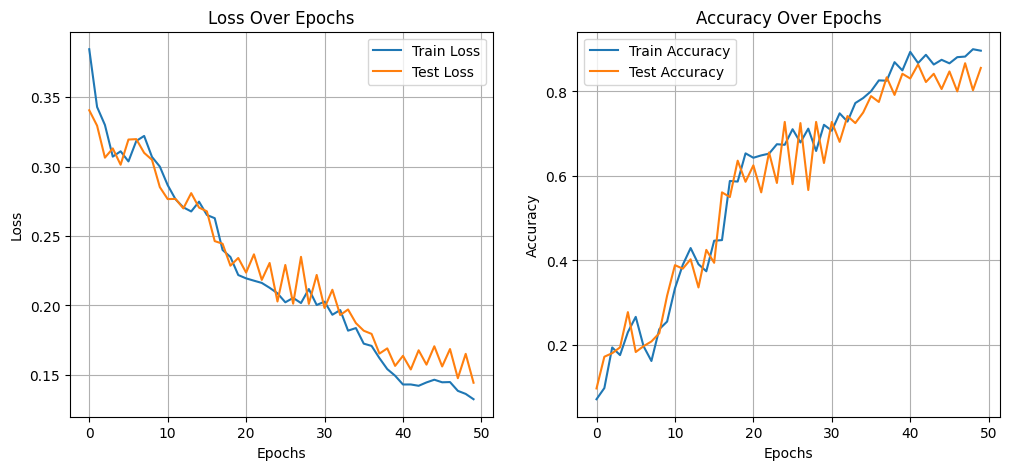

In [117]:
mlp.fit(X_train, Y_train, X_test, Y_test, epochs=50)

12. Evaluating Model Performance

Check the final loss and accuracy of the model on the test set.

In [118]:
test_loss, test_accuracy = mlp.evaluate(X_test, Y_test)
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")

Final Test Loss: 0.1444
Final Test Accuracy: 0.8556


13. Comparing Custom and Sklearn OneHotEncoders

Verify if the custom OneHotEncoder produces the same results as Scikit-learn's OneHotEncoder.

In [119]:
y_test_inverse = encoder.inverse_transform(Y_test)
sklearn_encoder = SklearnOneHotEncoder()
Y_test_sklearn = sklearn_encoder.fit_transform(Y.reshape(-1, 1))

if np.array_equal(Y_test, Y_test_sklearn):
    print("Custom OneHotEncoder matches Sklearn OneHotEncoder!")
else:
    print("Custom OneHotEncoder does not match Sklearn OneHotEncoder!")

Custom OneHotEncoder does not match Sklearn OneHotEncoder!


14. Predicting a Handwritten Image

Define a function to predict the label of a new handwritten image using OpenCV preprocessing and the trained MLP model.

In [120]:
import cv2
def predict_handwritten_image(image_path, model):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
    image = cv2.resize(image, (8, 8))  
    image = 16 - (image / 255.0 * 16) 
    image = image.flatten().reshape(1, -1)  
    plt.imshow(image.reshape(8, 8), cmap='gray')
    plt.title("Handwritten Image")
    plt.show()
    
    y_pred = model.forward(image)
    predicted_label = np.argmax(y_pred)
    print(f"Predicted Output Probabilities: {y_pred}")
    print(f"Predicted Label: {predicted_label}")
    return predicted_label

15. Running Prediction on a New Image

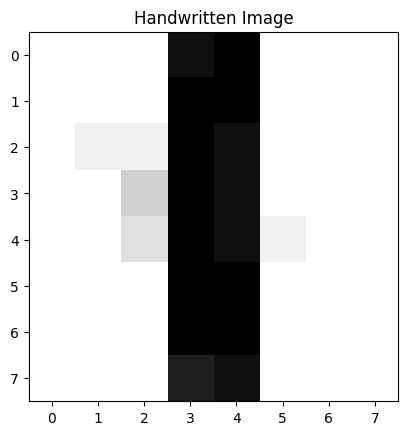

Predicted Output Probabilities: [[0.01522451 0.01611148 0.01443511 0.00166528 0.1385019  0.07235215
  0.01552154 0.24972905 0.00949926 0.46695973]]
Predicted Label: 9
The model predicts this image as: 9


In [121]:
image_path = "pic.jpg"
predicted_label = predict_handwritten_image(image_path, mlp)
print(f"The model predicts this image as: {predicted_label}")